In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('max_colwidth', 5000)
import pandas_profiling
from IPython.display import display
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

## Load Data From CSV File

First thing is merging the csv file into one file <br />
Here is the code:
`cat *.csv >merged.csv`
<br/>
**Note:** to read the csv file in, need to do skiprows=1 and low_memory=False

<br/>
Next, take a look at the data. Simple command to explore the data so I can explore over time

In [2]:
df_backup = pd.read_csv('merged.csv', skiprows=1, low_memory=False)

In [85]:
df = df_backup.copy()

In [4]:
def explore_data(dataframe):
    print('The number of rows is {:,} and the number of columns is {:,}'.format(dataframe.shape[0], dataframe.shape[1]))

In [45]:
explore_data(df)

The number of rows is 2,384,832 and the number of columns is 150


In [86]:
df = df[df.id!='id'] # leave behind those that do not have id in the id column
# due to csv merge, need to eliminate rows with redundant index; 16 of these

In [42]:
df['loan_amnt'].value_counts().sum() - df.shape[0]

-51

In [43]:
df.loan_status.value_counts()

Fully Paid                                             1191125
Current                                                 868848
Charged Off                                             287174
Late (31-120 days)                                       20775
In Grace Period                                           9242
Late (16-30 days)                                         4826
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     42
Name: loan_status, dtype: int64

In [44]:
# df[df['loan_status']=='Charged Off'].sum() / df['loan_amnt'].value_counts().sum()
# this keeps locking up

In [17]:
print("Charged off loans as a % of total: {:.1%}".format(287174/2384848))

Charged off loans as a % of total: 12.0%


In [18]:
print("Fully Paid loans as a % of total: {:.1%}".format(1191125/2384848))

Fully Paid loans as a % of total: 49.9%


In [19]:
print("Current loans as a % of total: {:.1%}".format(868848/2384848))

Current loans as a % of total: 36.4%


In [28]:
# df[df.hardship_loan_status!=np.nan] this also broke the machine

In [57]:
df.sec_app_mths_since_last_major_derog.value_counts().sum()

41941

### Multiple DataFrames
I will create a series of dataframes based on factors that I can then work with and combine rather than one big monolith

In [46]:
df_hardship = df[['loan_amnt','issue_d','funded_amnt','term','int_rate','grade','loan_status','hardship_flag','hardship_status','deferral_term','hardship_amount','hardship_length','hardship_loan_status','hardship_payoff_balance_amount']]

In [40]:
df_hardship.hardship_loan_status.value_counts()

Late (16-30 days)       5015
In Grace Period         3221
Current                 2803
Late (31-120 days)       497
hardship_loan_status      16
Issued                     4
Name: hardship_loan_status, dtype: int64

In [47]:
df_late_hardship = df_hardship.loc[df_hardship['hardship_loan_status'] == 'Late (16-30 days)']

In [55]:
df_late_hardship

loan_amnt   issue_d funded_amnt        term int_rate grade  \
48684       35000  Dec-2013       35000   60 months   15.61%     C   
51790       10000  Dec-2013       10000   60 months   14.98%     C   
53084       11650  Dec-2013       11650   60 months   25.99%     G   
54133       12000  Dec-2013       12000   60 months   18.55%     D   
57616       22100  Nov-2013       22100   60 months   15.61%     C   
59916       12000  Nov-2013       12000   60 months   21.70%     E   
68535       24000  Nov-2013       24000   60 months   19.52%     D   
72528       10000  Oct-2013       10000   60 months   20.20%     D   
77047       22000  Oct-2013       22000   60 months   18.55%     D   
77726       10000  Oct-2013       10000   60 months   21.70%     E   
81867       11500  Oct-2013       11500   60 months   19.52%     D   
85765       24000  Oct-2013       24000   60 months   16.20%     C   
93532       20000  Sep-2013       20000   60 months    9.71%     B   
93884       17000  Sep-2013       17000   60 months   15.22%     C   
96711       31300  Sep-2013       31300   60 months   22.20%     E   
98157       21000  Sep-2013       21000   60 months   16.78%     C   
98503       35000  Sep-2013       35000   60 months   21.15%     E   
100950      15000  Aug-2013       15000   60 months   20.80%     E   
101691      14125  Aug-2013       14125   60 months   17.56%     D   
107407      21000  Aug-2013       21000   60 months   16.78%     C   
111811      18000  Aug-2013       18000   60 months   22.70%     E   
120680      16000  Jul-2013       16000   60 months   22.20%     E   
125406      35000  Jul-2013       35000   60 months   21.00%     E   
130051      15000  Jun-2013       15000   60 months   16.29%     C   
130195      24000  Jun-2013       24000   60 months   23.63%     F   
134906      20000  May-2013       20000   60 months   23.63%     F   
143692      32875  May-2013       32875   60 months   21.00%     E   
143813      35000  May-2013       35000   60 months   21.98%     E   
146472      20000  Apr-2013       20000   60 months   16.29%     C   
149449      20000  Apr-2013       20000   60 months   15.80%     C   
163030      25000  Feb-2013       25000   60 months   19.72%     D   
177567      19200  Dec-2012       19200   60 months   17.77%     D   
180221      19125  Dec-2012       19125   60 months   16.29%     C   
187905      35000  Nov-2012       35000   60 months   24.83%     G   
230859      13825  Dec-2014       13825   60 months   13.66%     C   
231912      12000  Dec-2014       12000   60 months   14.31%     C   
233292      10775  Dec-2014       10775   60 months   13.66%     C   
234117      20000  Dec-2014       20000   60 months   10.49%     B   
234151      14075  Dec-2014       14075   60 months   19.99%     E   
234456      18600  Dec-2014       18600   60 months   17.86%     D   
234758      13000  Dec-2014       13000   60 months   17.86%     D   
235098      19200  Dec-2014       19200   60 months   15.59%     D   
235136      15000  Dec-2014       15000   60 months   10.49%     B   
235237      16000  Dec-2014       16000   60 months   15.59%     D   
236018      16000  Dec-2014       16000   36 months   10.49%     B   
237300      18825  Dec-2014       18825   60 months   17.14%     D   
237978      24625  Dec-2014       24625   60 months   17.86%     D   
238585      15350  Dec-2014       15350   60 months   23.99%     F   
238822      20000  Dec-2014       20000   60 months   13.66%     C   
240269      18000  Nov-2014       18000   60 months    8.19%     A   
240512      12150  Nov-2014       12150   36 months   13.66%     C   
240893      24000  Nov-2014       24000   60 months   16.49%     D   
242287      22375  Nov-2014       22375   60 months   20.99%     E   
242756      20000  Nov-2014       20000   36 months   12.39%     C   
243332      18550  Nov-2014       18550   60 months   19.99%     E   
243579      12000  Nov-2014       12000   60 months   10.49%     B   
244686      11200 

In [54]:
df_late_hardship[df_late_hardship.loan_status=='Default']

loan_amnt   issue_d funded_amnt        term int_rate grade  \
51790       10000  Dec-2013       10000   60 months   14.98%     C   
1529147     35000  Dec-2017       35000   36 months   14.08%     C   

        loan_status hardship_flag hardship_status deferral_term  \
51790       Default             N       COMPLETED             3   
1529147     Default             N       COMPLETED             3   

        hardship_amount hardship_length hardship_loan_status  \
51790             38.02               3    Late (16-30 days)   
1529147          303.08               3    Late (16-30 days)   

        hardship_payoff_balance_amount  
51790                          3126.02  
1529147                       26382.01

# Preprocessing

Below is the preprocessing to clean up the CSV file

What may be a good strategy here is to analyze columns in bunches of ten and then determine which to keep and which to drop - that should make it more manageable

In [6]:
df[df['id']=='id'] 

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
42539    id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
230724   id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
466357   id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
887456   id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
1021347  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
1119205  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
1218329  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
1321879  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
1418662  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
1524117  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
1642769  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
1750637  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
1881413  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
2009611  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
2138027  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   
2253706  id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term   

         int_rate  installment  grade  sub_grade  emp_title  emp_length  \
42539    int_rate  installment  grade  sub_grade  emp_title  emp_length   
230724   int_rate  installment  grade  sub_grade  emp_title  emp_length   
466357   int_rate  installment  grade  sub_grade  emp_title  emp_length   
887456   int_rate  installment  grade  sub_grade  emp_title  emp_length   
1021347  int_rate  installment  grade  sub_grade  emp_title  emp_length   
1119205  int_rate  installment  grade  sub_grade  emp_title  emp_length   
1218329  int_rate  installment  grade  sub_grade  emp_title  emp_length   
1321879  int_rate  installment  grade  sub_grade  emp_title  emp_length   
1418662  int_rate  installment  grade  sub_grade  emp_title  emp_length   
1524117  int_rate  installment  grade  sub_grade  emp_title  emp_length   
1642769  int_rate  installment  grade  sub_grade  emp_title  emp_length   
1750637  int_rate  installment  grade  sub_grade  emp_title  emp_length   
1881413  int_rate  installment  grade  sub_grade  emp_title  emp_length   
2009611  int_rate  installment  grade  sub_grade  emp_title  emp_length   
2138027  int_rate  installment  grade  sub_grade  emp_title  emp_length   
2253706  int_rate  installment  grade  sub_grade  emp_title  emp_length   

         home_ownership  annual_inc  verification_status  issue_d  \
42539    home_ownership  annual_inc  verification_status  issue_d   
230724   home_ownership  annual_inc  verification_status  issue_d   
466357   home_ownership  annual_inc  verification_status  issue_d   
887456   home_ownership  annual_inc  verification_status  issue_d   
1021347  home_ownership  annual_inc  verification_status  issue_d   
1119205  home_ownership  annual_inc  verification_status  issue_d   
1218329  home_ownership  annual_inc  verification_status  issue_d   
1321879  home_ownership  annual_inc  verification_status  issue_d   
1418662  home_ownership  annual_inc  verification_status  issue_d   
1524117  home_ownership  annual_inc  verification_status  issue_d   
1642769  home_ownership  annual_inc  verification_status  issue_d   
1750637  home_ownership  annual_inc  verification_status  issue_d   
1881413  home_ownership  annual_inc  verification_status  issue_d   
2009611  home_ownership  annual_inc  verification_status  issue_d   
2138027  home_ownership  annual_inc  verification_status  issue_d   
2253706  home_ownership  annual_inc  verification_status  issue_d   

         loan_status  pymnt_plan  url  desc  purpose  title  zip_code  \
42539    loan_status  pymnt_plan  url  desc  purpose  title  zip_code   
230724   loan_status  pymnt_plan  url  desc  purpose  title  zip_code   
466357   loan_status  pymnt_plan  url  desc  purpose  title  zip_code   
887456   loan_status  pym

In [87]:
df = df.drop(['url','desc'],axis=1) # drop a couple of easy columns

In [88]:
df = df.drop(['member_id','orig_projected_additional_accrued_interest'],axis=1)

In [10]:
# df = df.drop([],axis=1)

In [11]:
# df = df.drop([],axis=1)

In [58]:
# df = df.drop([],axis=1)

In [89]:
df = df.drop(['fico_range_low','fico_range_high','sec_app_fico_range_low','sec_app_fico_range_high','last_fico_range_high','last_fico_range_low'],axis=1)

In [65]:
# df = df.drop([],axis=1)

In [90]:
df.head(2)

id loan_amnt funded_amnt funded_amnt_inv        term int_rate  \
0  1077501      5000        5000            4975   36 months   10.65%   
1  1077430      2500        2500            2500   60 months   15.27%   

  installment grade sub_grade emp_title emp_length home_ownership annual_inc  \
0      162.87     B        B2       NaN  10+ years           RENT      24000   
1       59.83     C        C4     Ryder   < 1 year           RENT      30000   

  verification_status   issue_d  loan_status pymnt_plan      purpose  \
0            Verified  Dec-2011   Fully Paid          n  credit_card   
1     Source Verified  Dec-2011  Charged Off          n          car   

      title zip_code addr_state    dti delinq_2yrs earliest_cr_line  \
0  Computer    860xx         AZ  27.65           0         Jan-1985   
1      bike    309xx         GA      1           0         Apr-1999   

  inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc  \
0              1                    NaN                    NaN        3   
1              5                    NaN                    NaN        3   

  pub_rec revol_bal revol_util total_acc initial_list_status out_prncp  \
0       0     13648      83.7%         9                   f      0.00   
1       0      1687       9.4%         4                   f      0.00   

  out_prncp_inv      total_pymnt total_pymnt_inv total_rec_prncp  \
0          0.00  5863.1551866952         5833.84         5000.00   
1          0.00          1014.53         1014.53          456.46   

  total_rec_int total_rec_late_fee recoveries collection_recovery_fee  \
0        863.16                0.0        0.0                     0.0   
1        435.17                0.0      122.9                    1.11   

  last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0     Jan-2015          171.62          NaN           May-2019   
1     Apr-2013          119.66          NaN           Oct-2016   

  collections_12_mths_ex_med mths_since_last_major_derog policy_code  \
0                          0                         NaN           1   
1                          0                         NaN           1   

  application_type annual_inc_joint dti_joint verification_status_joint  \
0       Individual              NaN       NaN                       NaN   
1       Individual              NaN       NaN                       NaN   

  acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m  \
0              0          NaN         NaN         NaN         NaN         NaN   
1              0          NaN         NaN         NaN         NaN         NaN   

  open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m  \
0         NaN                NaN          NaN     NaN         NaN         NaN   
1         NaN                NaN          NaN     NaN         NaN         NaN   

  max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m  \
0        NaN      NaN              NaN    NaN         NaN          NaN   
1        NaN      NaN              NaN    NaN         NaN          NaN   

  acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util  \
0                  NaN         NaN            NaN     NaN   
1                  NaN         NaN            NaN     NaN   

  chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct  \
0                        0           0                NaN   
1                        0           0                NaN   

  mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc  \
0                  NaN                   NaN            NaN      NaN   
1                  NaN                   NaN            NaN      NaN   

  mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq  \
0                  NaN                      NaN                   NaN   
1                  NaN                      NaN                   NaN   

  mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl  \
0          

In [91]:
convert_to_numeric = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','annual_inc_joint','dti_joint','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens','hardship_amount','hardship_last_payment_amount','hardship_payoff_balance_amount','settlement_amount','revol_bal_joint','dti_joint','annual_inc_joint']
# known to be easy conversion to numeric

In [92]:
type(df.funded_amnt[0])

str

In [144]:
for items in convert_to_numeric:
    df[items] = pd.to_numeric(df[items])

In [152]:
df.total_rev_hi_lim.fillna(df['funded_amnt'], inplace=True)

In [153]:
df.loan_status.value_counts()

Fully Paid                                             1191125
Current                                                 868848
Charged Off                                             287174
Late (31-120 days)                                       20775
In Grace Period                                           9242
Late (16-30 days)                                         4826
Does not meet the credit policy. Status:Fully Paid        1962
Does not meet the credit policy. Status:Charged Off        758
Default                                                     42
Name: loan_status, dtype: int64

In [154]:
df['good_bad'] = np.where(df.loan_status.isin(['Charged Off','Default','Does not meet the credit policy. Status:Fully Paid','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)','Late (16-30 days)']),0,1)

In [156]:
df.head(2)

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501     5000.0       5000.0           4975.0   36 months   10.65%   
1  1077430     2500.0       2500.0           2500.0   60 months   15.27%   

   installment grade sub_grade emp_title emp_length home_ownership  \
0       162.87     B        B2       NaN  10+ years           RENT   
1        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status   issue_d  loan_status pymnt_plan  \
0     24000.0            Verified  Dec-2011   Fully Paid          n   
1     30000.0     Source Verified  Dec-2011  Charged Off          n   

       purpose     title zip_code addr_state    dti  delinq_2yrs  \
0  credit_card  Computer    860xx         AZ  27.65          0.0   
1          car      bike    309xx         GA   1.00          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0         Jan-1985             1.0                     NaN   
1         Apr-1999             5.0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN       3.0      0.0    13648.0      83.7%        9.0   
1                     NaN       3.0      0.0     1687.0       9.4%        4.0   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f        0.0            0.0  5863.155187          5833.84   
1                   f        0.0            0.0  1014.530000          1014.53   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                 0.0         0.0   
1           456.46         435.17                 0.0       122.9   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                     0.00     Jan-2015           171.62          NaN   
1                     1.11     Apr-2013           119.66          NaN   

  last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  \
0           May-2019                         0.0                          NaN   
1           Oct-2016                         0.0                          NaN   

   policy_code application_type  annual_inc_joint  dti_joint  \
0          1.0       Individual               NaN        NaN   
1          1.0       Individual               NaN        NaN   

  verification_status_joint  acc_now_delinq tot_coll_amt tot_cur_bal  \
0                       NaN             0.0          NaN         NaN   
1                       NaN             0.0          NaN         NaN   

  open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il  \
0         NaN         NaN         NaN         NaN                NaN   
1         NaN         NaN         NaN         NaN                NaN   

  total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util  \
0          NaN     NaN         NaN         NaN        NaN      NaN   
1          NaN     NaN         NaN         NaN        NaN      NaN   

  total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths  \
0             5000    NaN         NaN          NaN                  NaN   
1             2500    NaN         NaN          NaN                  NaN   

  avg_cur_bal bc_open_to_buy bc_util  chargeoff_within_12_mths  delinq_amnt  \
0         NaN            NaN     NaN                       0.0          0.0   
1         NaN            NaN     NaN                       0.0          0.0   

  mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op  \
0                NaN                  NaN                   NaN   
1                NaN                  NaN                   NaN   

  mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq  \
0            NaN      NaN                  NaN                      NaN   
1            NaN      NaN                  NaN                      NaN   

  mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_12

In [117]:
def missing_values(dataframe,column):
    # print(dataframe[dataframe[column].isnull()])
    dataframe = dataframe[dataframe[column].notnull()]
    return dataframe

In [118]:
df = missing_values(df,'loan_amnt') 

In [52]:
# df = df[df.loan_amnt.notnull()]

In [21]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Default',
       'Current', 'Late (31-120 days)', 'In Grace Period',
       'Late (16-30 days)'], dtype=object)

In [22]:
df.shape
# dropped another 51 from loan_amnt

(2384781, 111)

### Employment Length Preprocessing

In [100]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [101]:
def emp_length(dataframe,column):
    dataframe[column+'_int'] = dataframe[column]
    dataframe[column+'_int'] = dataframe[column+'_int'].str.replace('\+ years','')
    dataframe[column+'_int'] = dataframe[column+'_int'].str.replace('< 1 year',str(0))
    dataframe[column+'_int'] = dataframe[column+'_int'].str.replace('n\a',str(0))
    dataframe[column+'_int'] = dataframe[column+'_int'].str.replace(' years','')
    dataframe[column+'_int'] = dataframe[column+'_int'].str.replace(' year','')
    dataframe[column+'_int'] = pd.to_numeric(dataframe[column+'_int'])

In [102]:
emp_length(df,'emp_length')

In [103]:
df.emp_length_int.fillna(0, inplace=True)
# doing this instead of notnull because that drops the rows and this just replaces the nan with zero
# question is does this make sense

In [27]:
# df = df[df.emp_length_int.notnull()]
# df = missing_values(df,'emp_length_int')

In [104]:
df.emp_length_int.unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7.])

In [105]:
df.shape

(2384832, 141)

In [106]:
df.head(2)

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501     5000.0       5000.0           4975.0   36 months   10.65%   
1  1077430     2500.0       2500.0           2500.0   60 months   15.27%   

   installment grade sub_grade emp_title emp_length home_ownership  \
0       162.87     B        B2       NaN  10+ years           RENT   
1        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status   issue_d  loan_status pymnt_plan  \
0     24000.0            Verified  Dec-2011   Fully Paid          n   
1     30000.0     Source Verified  Dec-2011  Charged Off          n   

       purpose     title zip_code addr_state    dti  delinq_2yrs  \
0  credit_card  Computer    860xx         AZ  27.65          0.0   
1          car      bike    309xx         GA   1.00          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0         Jan-1985             1.0                     NaN   
1         Apr-1999             5.0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN       3.0      0.0    13648.0      83.7%        9.0   
1                     NaN       3.0      0.0     1687.0       9.4%        4.0   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f        0.0            0.0  5863.155187          5833.84   
1                   f        0.0            0.0  1014.530000          1014.53   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                 0.0         0.0   
1           456.46         435.17                 0.0       122.9   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                     0.00     Jan-2015           171.62          NaN   
1                     1.11     Apr-2013           119.66          NaN   

  last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  \
0           May-2019                         0.0                          NaN   
1           Oct-2016                         0.0                          NaN   

   policy_code application_type  annual_inc_joint  dti_joint  \
0          1.0       Individual               NaN        NaN   
1          1.0       Individual               NaN        NaN   

  verification_status_joint  acc_now_delinq tot_coll_amt tot_cur_bal  \
0                       NaN             0.0          NaN         NaN   
1                       NaN             0.0          NaN         NaN   

  open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il  \
0         NaN         NaN         NaN         NaN                NaN   
1         NaN         NaN         NaN         NaN                NaN   

  total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util  \
0          NaN     NaN         NaN         NaN        NaN      NaN   
1          NaN     NaN         NaN         NaN        NaN      NaN   

  total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths  \
0              NaN    NaN         NaN          NaN                  NaN   
1              NaN    NaN         NaN          NaN                  NaN   

  avg_cur_bal bc_open_to_buy bc_util  chargeoff_within_12_mths  delinq_amnt  \
0         NaN            NaN     NaN                       0.0          0.0   
1         NaN            NaN     NaN                       0.0          0.0   

  mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op  \
0                NaN                  NaN                   NaN   
1                NaN                  NaN                   NaN   

  mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq  \
0            NaN      NaN                  NaN                      NaN   
1            NaN      NaN                  NaN                      NaN   

  mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_12

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2384781 entries, 0 to 2384845
Columns: 112 entries, id to emp_length_int
dtypes: float64(1), object(111)
memory usage: 2.0+ GB


### Term Preprocessing

In [107]:
df['term_int'] = df['term'].str.replace(' months','')

In [108]:
df['term_int'] = pd.to_numeric(df['term_int'])

Check to make sure converted this properly

In [119]:
df['term_int'].value_counts()

36.0    1688390
60.0     696391
Name: term_int, dtype: int64

### Earliest Credit Line Preprocessing

In [121]:
df[df['earliest_cr_line'].isna()] # should be 29 rows with null

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
42450  79967     5000.0       5000.0           3025.0   36 months    7.43%   
42451  79924     7000.0       7000.0           3450.0   36 months    7.75%   
42460  71823     4350.0       4350.0            825.0   36 months    8.07%   
42473  72197     3900.0       3900.0           2025.0   36 months    9.33%   
42481  79893     6700.0       6700.0           6700.0   36 months    7.75%   
42484  73003     3200.0       3200.0           2000.0   36 months    9.96%   
42495  72819     7200.0       5075.0            350.0   36 months   10.28%   
42510  91023     1900.0       1900.0            900.0   36 months    9.64%   
42515  85961     1200.0       1200.0            500.0   36 months    9.01%   
42516  85818     5000.0       5000.0            375.0   36 months   11.22%   
42517  85781     1400.0       1400.0            475.0   36 months   10.91%   
42518  85675     1000.0       1000.0            625.0   36 months   14.07%   
42519  84670     5000.0       5000.0            300.0   36 months    7.75%   
42520  84098     2500.0       2500.0            225.0   36 months    7.43%   
42521  83979     3000.0       3000.0            250.0   36 months    7.43%   
42522  83489     2600.0       2600.0            575.0   36 months    8.38%   
42523  83185     1000.0       1000.0            625.0   36 months    7.12%   
42524  74014     6450.0       6450.0              0.0   36 months   11.22%   
42525  76629     1275.0       1275.0              0.0   36 months   12.49%   
42526  81085    10500.0      10500.0            275.0   36 months   11.22%   
42527  77792     3000.0       3000.0            125.0   36 months    9.01%   
42528  77757     3000.0       3000.0              0.0   36 months    9.33%   
42529  74505     2000.0       2000.0            225.0   36 months    9.96%   
42530  74323     6500.0       6500.0              0.0   36 months    9.64%   
42531  73582     3500.0       3500.0            225.0   36 months   10.28%   
42532  72998     1000.0       1000.0              0.0   36 months    9.64%   
42533  72176     2525.0       2525.0            225.0   36 months    9.33%   
42534  71623     6500.0       6500.0              0.0   36 months    8.38%   
42535  70686     5000.0       5000.0              0.0   36 months    7.75%   

       installment grade sub_grade  \
42450       155.38     A        A2   
42451       218.55     A        A3   
42460       136.45     A        A4   
42473       124.62     B        B3   
42481       209.18     A        A3   
42484       103.20     B        B5   
42495       164.42     C        C1   
42510        61.00     B        B4   
42515        38.17     B        B2   
42516       164.23     C        C4   
42517        45.78     C        C3   
42518        34.21     E        E3   
42519       156.11     A        A3   
42520        77.69     A        A2   
42521        93.23     A        A2   
42522        81.94     A        A5   
42523        30.94     A        A1   
42524       211.85     C        C4   
42525        42.65     D        D3   
42526       344.87     C        C4   
42527        95.42     B        B2   
42528        95.86     B        B3   
42529        64.50     B        B5   
42530       208.66     B        B4   
42531       113.39     C        C1   
42532        32.11     B        B4   
42533        80.69     B        B3   
42534       204.84     A        A5   
42535       156.11     A        A3   

                                           emp_title emp_length  \
42450                                            NaN   < 1 year   
42451                                            NaN   < 1 year   
42460                                            NaN   < 1 year   
42473                                            NaN   < 1 year   
42481                                            NaN   < 1 year   
42484                                            NaN   < 1 year   
42495                                            NaN   < 1 

## Need to figure out what to do with all the nulls in 'earliest cr line'
Seems like they are all in loan_status "Does not meet the credit policy. Status: Fully Paid"
If all of them are fully paid, then I can exclude them from the transformation so need to check that

In [36]:
#df.drop(df[df.earliest_cr_line.isna()].index,axis=1)

In [122]:
df = df[df.earliest_cr_line.notnull()]

In [38]:
df.earliest_cr_line.unique()

array(['Jan-1985', 'Apr-1999', 'Nov-2001', 'Feb-1996', 'Jan-1996',
       'Nov-2004', 'Jul-2005', 'Jan-2007', 'Apr-2004', 'Sep-2004',
       'Jan-1998', 'Oct-1989', 'Jul-2003', 'May-1991', 'Sep-2007',
       'Oct-1998', 'Aug-1993', 'Oct-2003', 'Jan-2001', 'Nov-1997',
       'Feb-1983', 'Jul-1985', 'Apr-2003', 'Jun-2001', 'Feb-2002',
       'Aug-1984', 'Nov-2006', 'Dec-1987', 'Nov-1981', 'Feb-1997',
       'Apr-2005', 'Oct-2007', 'Dec-2000', 'Apr-2007', 'Dec-2001',
       'Jan-2003', 'Mar-1994', 'Sep-1998', 'Jun-2004', 'Nov-1995',
       'Jul-1999', 'Jun-1995', 'Sep-1992', 'Jan-2002', 'Apr-1992',
       'Oct-2006', 'May-2000', 'Dec-1998', 'Dec-2004', 'Oct-2000',
       'May-2002', 'May-2006', 'Jul-2002', 'Jul-2006', 'May-1997',
       'Oct-2005', 'Apr-1995', 'Oct-2002', 'Jan-2000', 'Apr-2000',
       'Dec-1994', 'Sep-2005', 'Dec-1984', 'Dec-1999', 'Nov-2003',
       'Jun-1989', 'Jun-2003', 'Oct-1996', 'May-2003', 'Jun-2002',
       'Jun-2007', 'Dec-1996', 'Feb-1984', 'Sep-2002', 'Jan-19

In [123]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'],format = '%b-%Y')

In [124]:
pd.to_datetime('2019-8-01') - df['earliest_cr_line_date'][-10:] 

2384836    4017 days
2384837    5600 days
2384838   10470 days
2384839    5539 days
2384840    6056 days
2384841    6390 days
2384842    7762 days
2384843    5691 days
2384844   10896 days
2384845    7061 days
Name: earliest_cr_line_date, dtype: timedelta64[ns]

In [125]:
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2019-8-01')-df['earliest_cr_line_date'])/np.timedelta64(1,'M')))

In [42]:
min(df['mths_since_earliest_cr_line'])
# check to make sure min value is not negative

39.0

### Need to do the same transformation for 'issue_date'

In [126]:
# Assume we are now in August 2019
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format = '%b-%Y')
# Extracts the date and the time from a string variable that is in a given format.
df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2019-8-01') - df['issue_d_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.

# Before going further with my one hot encoding, need to drop irrelevant columns

In [127]:
def null_values(d):
    mis_valu = d.isnull().sum()
    mis_val_percent = 100* d.isnull().sum() / len(d)
    mis_val_table = pd.concat([mis_valu, mis_val_percent],axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!=0].sort_values('% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(d.shape[1]) + " columns.\n There are "+ str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    return mis_val_table_ren_columns

In [128]:
miss_values = null_values(df)

Dataframe has 146 columns.
 There are 100 columns that have missing values.


In [ ]:
# del_list = ['mths_since_last_record','mths_since_recent_bc_dlq','mths_since_last_major_derog','']

In [142]:
miss_values.head(40)

Missing Values  % of Total Values
hardship_end_date                           2373212               99.5
payment_plan_start_date                     2373212               99.5
hardship_start_date                         2373212               99.5
hardship_amount                             2373212               99.5
deferral_term                               2373212               99.5
hardship_status                             2373212               99.5
hardship_reason                             2373212               99.5
hardship_type                               2373212               99.5
hardship_length                             2373212               99.5
hardship_last_payment_amount                2373212               99.5
hardship_dpd                                2373212               99.5
hardship_payoff_balance_amount              2373212               99.5
hardship_loan_status                        2373212               99.5
settlement_term                             2345268               98.3
debt_settlement_flag_date                   2345268               98.3
settlement_status                           2345268               98.3
settlement_date                             2345268               98.3
settlement_amount                           2345268               98.3
settlement_percentage                       2345268               98.3
sec_app_mths_since_last_major_derog         2342811               98.2
sec_app_revol_util                          2256956               94.6
revol_bal_joint                             2254769               94.5
sec_app_num_rev_accts                       2254768               94.5
sec_app_chargeoff_within_12_mths            2254768               94.5
sec_app_open_acc                            2254768               94.5
sec_app_collections_12_mths_ex_med          2254768               94.5
sec_app_mort_acc                            2254768               94.5
sec_app_inq_last_6mths                      2254768               94.5
sec_app_open_act_il                         2254768               94.5
sec_app_earliest_cr_line                    2254768               94.5
verification_status_joint                   2251157               94.4
dti_joint                                   2242083               94.0
annual_inc_joint                            2242079               94.0
mths_since_last_record                      2016958               84.6
mths_since_recent_bc_dlq                    1845573               77.4
mths_since_last_major_derog                 1783439               74.8
mths_since_recent_revol_delinq              1615607               67.7
next_pymnt_d                                1478299               62.0
mths_since_last_delinq                      1237571               51.9
il_util                                     1087696               45.6

In [47]:
target_list = [1 if i=='Default' else 0 for i in df['loan_status']]

In [48]:
vars_w_na = [var for var in df.columns if df[var].isnull().mean()>0]

In [49]:
vars_w_na

['emp_title',
 'emp_length',
 'title',
 'zip_code',
 'dti',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev

In [295]:
df['TARGET'] = target_list
df['TARGET'].value_counts()

0    2384710
1         42
Name: TARGET, dtype: int64

In [50]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Default',
       'Current', 'Late (31-120 days)', 'In Grace Period',
       'Late (16-30 days)'], dtype=object)

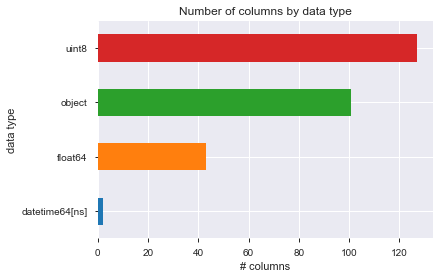

In [145]:
df.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns by data type')
plt.xlabel("# columns")
plt.ylabel("data type");

In [97]:
df.select_dtypes('float64').apply(pd.Series.nunique, axis=0)

loan_amnt                         1572
funded_amnt                       1572
funded_amnt_inv                  10059
installment                      94838
annual_inc                       92753
dti                              11557
delinq_2yrs                         35
inq_last_6mths                      28
mths_since_last_delinq             175
mths_since_last_record             129
open_acc                            90
pub_rec                             41
revol_bal                       105050
total_acc                          154
out_prncp                       368971
out_prncp_inv                   380233
total_pymnt                    1717249
total_pymnt_inv                1358682
total_rec_prncp                 498367
total_rec_int                   653879
total_rec_late_fee               19709
recoveries                      146116
collection_recovery_fee         162260
last_pymnt_amnt                 740243
collections_12_mths_ex_med          16
mths_since_last_major_der

In [53]:
df.select_dtypes('int64').apply(pd.Series.nunique, axis=0)

term_int    2
dtype: int64

In [98]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

id                                     2384817
term                                         2
int_rate                                   688
grade                                        7
sub_grade                                   35
emp_title                               529180
emp_length                                  11
home_ownership                               6
verification_status                          3
issue_d                                    142
loan_status                                  9
pymnt_plan                                   2
purpose                                     14
title                                    63155
zip_code                                   957
addr_state                                  51
earliest_cr_line                           760
revol_util                                1428
initial_list_status                          2
last_pymnt_d                               142
next_pymnt_d                               104
last_credit_p

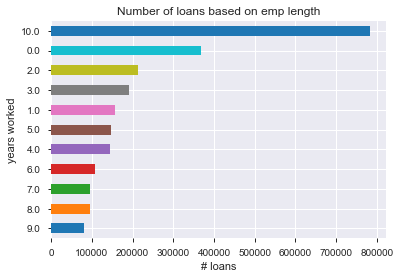

In [56]:
df['emp_length_int'].value_counts().sort_values().plot(kind='barh')
plt.title('Number of loans based on emp length')
plt.xlabel('# loans')
plt.ylabel('years worked');

In [327]:
import seaborn as sns

In [55]:
# fig = plt.figure()
# sns.violinplot(x='TARGET', y='loan_amnt', data=df, plit=True, color='pink');
# this killed my kernel last time

# Preprocess Discrete Var:
list_dummies = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'address_state', 'initial_list_status']

In [ ]:
#pd.get_dummies(df['grade'])
# Create dummy variables from a variable.

In [ ]:
#loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [140]:
df.shape

(2384752, 273)

In [ ]:
#df = pd.concat([df, loan_data_dummies], axis = 1)

In [133]:
lst = ['grade','sub_grade','home_ownership','verification_status','loan_status','purpose','addr_state','initial_list_status']
def loan_data_d(dataframe, lst = []):
    for items in lst:
        loan_data_dummies = [pd.get_dummies(dataframe[items], prefix=items,prefix_sep=':')]
        loan_data_dummies = pd.concat(loan_data_dummies, axis=1)
        dataframe = pd.concat([dataframe, loan_data_dummies], axis = 1)
    return dataframe
    # I think I can run this in the format below but will need to test it out 
    # think issue is I need to then concatenate to the original dataframe

In [139]:
df = loan_data_d(df,lst)

In [190]:
df.shape

(2384752, 274)

In [ ]:
# loan_data_d(df, lst=list_dummies)

## Missing Values

In [131]:
df.isnull().sum()

id                                           0
loan_amnt                                    0
funded_amnt                                  0
funded_amnt_inv                              0
term                                         0
int_rate                                     0
installment                                  0
grade                                        0
sub_grade                                    0
emp_title                               196690
emp_length                              161046
home_ownership                               0
annual_inc                                   0
verification_status                          0
issue_d                                      0
loan_status                                  0
pymnt_plan                                   0
purpose                                      0
title                                    23325
zip_code                                     1
addr_state                                   0
dti          

In [182]:
df.head(1)

id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
0  1077501       NaN      5000        5000            4975   36 months   

  int_rate installment grade sub_grade emp_title emp_length home_ownership  \
0    10.65      162.87     B        B2       NaN  10+ years           RENT   

  annual_inc verification_status   issue_d loan_status pymnt_plan  \
0      24000            Verified  Dec-2011  Fully Paid          n   

       purpose     title zip_code addr_state    dti delinq_2yrs  \
0  credit_card  Computer    860xx         AZ  27.65           0   

  earliest_cr_line fico_range_low fico_range_high inq_last_6mths  \
0         Jan-1985            735             739              1   

  mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal  \
0                    NaN                    NaN        3       0     13648   

  revol_util total_acc initial_list_status out_prncp out_prncp_inv  \
0      83.7%         9                   f      0.00          0.00   

       total_pymnt total_pymnt_inv total_rec_prncp total_rec_int  \
0  5863.1551866952         5833.84         5000.00        863.16   

  total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d  \
0                0.0        0.0                     0.0     Jan-2015   

  last_pymnt_amnt next_pymnt_d last_credit_pull_d last_fico_range_high  \
0          171.62          NaN           May-2019                  714   

  last_fico_range_low collections_12_mths_ex_med mths_since_last_major_derog  \
0                 710                          0                         NaN   

  policy_code application_type annual_inc_joint dti_joint  \
0           1       Individual              NaN       NaN   

  verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal  \
0                       NaN              0          NaN         NaN   

  open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il  \
0         NaN         NaN         NaN         NaN                NaN   

  total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util  \
0          NaN     NaN         NaN         NaN        NaN      NaN   

  total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths  \
0              NaN    NaN         NaN          NaN                  NaN   

  avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt  \
0         NaN            NaN     NaN                        0           0   

  mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op  \
0                NaN                  NaN                   NaN   

  mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq  \
0            NaN      NaN                  NaN                      NaN   

  mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd  \
0                   NaN                            NaN                   NaN   

  num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl  \
0            NaN             NaN         NaN       NaN       NaN   

  num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m  \
0           NaN           NaN                 NaN      NaN              NaN   

  num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq  \
0          NaN                NaN                NaN            NaN   

  percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim  \
0              NaN                    0         0             NaN   

  total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint  \
0               NaN            NaN                        NaN             NaN   

  sec_app_fico_range_low sec_app_fico_range_high sec_app_earliest_cr_line  \
0                    NaN                     NaN                      NaN   

  sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util  \
0                    NaN              NaN              NaN                NaN   

  sec_app_open_act_il sec_app_num_rev

In [134]:
df['total_rev_hi_lim'].fillna(df['funded_amnt'], inplace=True)
# 'Total revolving high credit/ credit limit', so it makes sense that the missing values are equal to funded_amnt.

In [135]:
df['total_rev_hi_lim'].isnull().sum()

0

In [136]:
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)
# fill the missing values with the mean value of the non-missing values.

In [ ]:
lst = ['mths_since_earliest_cr_line','acc_now_delinq','total_acc','pub_rec','open_acc','inq_last_6mths','delinq_2yrs','emp_length_int']
'''
use fill_na function here
'''
# df['mths_since_earliest_cr_line'].fillna(0, inplace=True)
# df['acc_now_delinq'].fillna(0, inplace=True)
# df['total_acc'].fillna(0, inplace=True)
# df['pub_rec'].fillna(0, inplace=True)
# df['open_acc'].fillna(0, inplace=True)
# df['inq_last_6mths'].fillna(0, inplace=True)
# df['delinq_2yrs'].fillna(0, inplace=True)
# df['emp_length_int'].fillna(0, inplace=True)

In [88]:
lst = ['mths_since_earliest_cr_line','acc_now_delinq','total_acc','pub_rec','open_acc','inq_last_6mths','delinq_2yrs','emp_length_int']
def fill_na(dataframe, lst):
    for items in lst:
        dataframe[items].fillna(0, inplace=True)

In [3]:
from IPython.display import display

Logistic Regression
$$ ln \left(\frac{non-default} {default}\right) = \sum_{j=1}^{m} \beta_j * X_j$$

Weight of Evidence
$$ WoE_i = ln \left(\frac{\%(y=1)_i}{\%(y=0)_i}\right) $$

Information Value
$$ IV = \sum_{i=1}^{k} \left[\left(\%(y=1)_i - \%(y=0)_i\right) * WoE_i\right] $$

In [ ]:
# df['loan_status'].value_counts()
# df['good_bad'] = np.where(df['loan_status'].isin(['Charge Off', 'Default','Does not ...', 'Late...']),0,1)

In [49]:
# df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],['home_ownership:OTHER'],['home_ownership:RENT'],['home_ownership:ANY']])

/Users/fayadabbasi/Desktop/Python_Scripts/Galvanize/DSI/CreditRisk/CreditRisk


### Issue Date Preprocessing

In [84]:
len(df['settlement_term']) - df['settlement_term'].isna().sum()

39484

# PD Model

In [157]:
df['loan_status'].value_counts() / df['loan_status'].count()
# gives proportion of each to the overall count

Fully Paid                                             0.499475
Current                                                0.364335
Charged Off                                            0.120421
Late (31-120 days)                                     0.008712
In Grace Period                                        0.003875
Late (16-30 days)                                      0.002024
Does not meet the credit policy. Status:Fully Paid     0.000823
Does not meet the credit policy. Status:Charged Off    0.000318
Default                                                0.000018
Name: loan_status, dtype: float64

# Need to make my train / test split

In [158]:
from sklearn.model_selection import train_test_split as tts

In [159]:
loan_data_input_train, loan_data_input_test, loan_data_target_train, loan_data_target_test = tts(df.drop('good_bad', axis=1), df['good_bad'], test_size=0.25, random_state=42)

In [161]:
df_inputs_prepr, df_targets_prepr = loan_data_input_train, loan_data_target_train

In [162]:
df_inputs_prepr.grade.unique()

array(['A', 'B', 'E', 'C', 'D', 'G', 'F'], dtype=object)

In [164]:
df1 = pd.concat([df_inputs_prepr.grade, df_targets_prepr], axis=1)

In [165]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count()

grade  good_bad
0     A    369115
1     B    523579
2     C    499864
3     D    257704
4     E    100247
5     F     30121
6     G      7934

In [170]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1-df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good']/ df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
    # for df use df_inputs_prepr, for discrete_variable_name use 'grade', for good_bad_variable_df use df_targets_prepr

In [171]:
df_temp = woe_discrete(df_inputs_prepr,'grade',df_targets_prepr)

In [173]:
df_temp.sort_values(by='grade')

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
6     A  369115   0.963488    0.206375  355638.0  13477.0     0.229166   
5     B  523579   0.909278    0.292737  476079.0  47500.0     0.306775   
4     C  499864   0.848709    0.279478  424239.0  75625.0     0.273371   
3     D  257704   0.789724    0.144084  203515.0  54189.0     0.131141   
2     E  100247   0.694195    0.056049   69591.0  30656.0     0.044843   
1     F   30121   0.609210    0.016841   18350.0  11771.0     0.011824   
0     G    7934   0.563272    0.004436    4469.0   3465.0     0.002880   

   prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
6    0.056941  1.392428        0.054210  0.968075  0.50993  
5    0.200690  0.424353        0.060569  0.580344  0.50993  
4    0.319520 -0.155991        0.058985  0.401248  0.50993  
3    0.228952 -0.557240        0.095529  0.503455  0.50993  
2    0.129523 -1.060694        0.084986  0.375816  0.50993  
1    0.049733 -1.436511        0.045938  0.189539  0.50993  
0    0.014640 -1.626049             NaN       NaN  0.50993

In [174]:
def plot_by_woe(df_WoE, rotation_of_x_axis_label=0):
    x = np.array(df_WoE.iloc[:,0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o', linestyle='--',color='k')
    plt.xlabel = (df_WoE.columns[0])
    plt.ylabel = ('Weight of Evidence')
    plt.title(str('Weight of Evidence by '+ df_WoE.columns[0]))
    plt.xticks(rotation=rotation_of_x_axis_label)
    # plot_by_woe(df_temp)

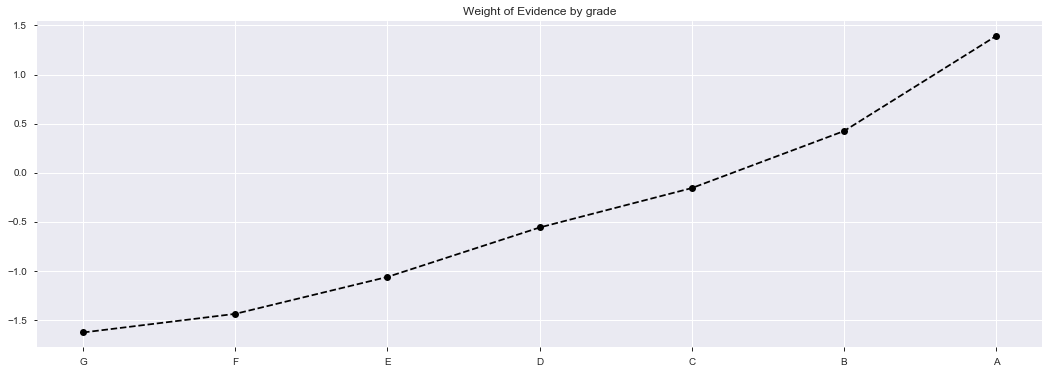

In [175]:
plot_by_woe(df_temp)

In [176]:
df_temp_2 = woe_discrete(df_inputs_prepr,'home_ownership', df_targets_prepr)

In [177]:
df_temp_2

home_ownership   n_obs  prop_good  prop_n_obs    n_good     n_bad  \
0          OTHER     138   0.615942    0.000077      85.0      53.0   
1           NONE      37   0.837838    0.000021      31.0       6.0   
2           RENT  703919   0.845521    0.393567  595178.0  108741.0   
3            OWN  200614   0.867367    0.112165  174006.0   26608.0   
4       MORTGAGE  881400   0.885193    0.492798  780209.0  101191.0   
5            ANY    2456   0.965798    0.001373    2372.0      84.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.000055    0.000224 -1.408142             NaN       NaN  0.027853  
1     0.000020    0.000025 -0.238274        0.221896  1.169868  0.027853  
2     0.383520    0.459437 -0.180610        0.007683  0.057664  0.027853  
3     0.112126    0.112420 -0.002623        0.021847  0.177986  0.027853  
4     0.502751    0.427538  0.162051        0.017826  0.164674  0.027853  
5     0.001528    0.000355  1.460171        0.080605  1.298120  0.027853

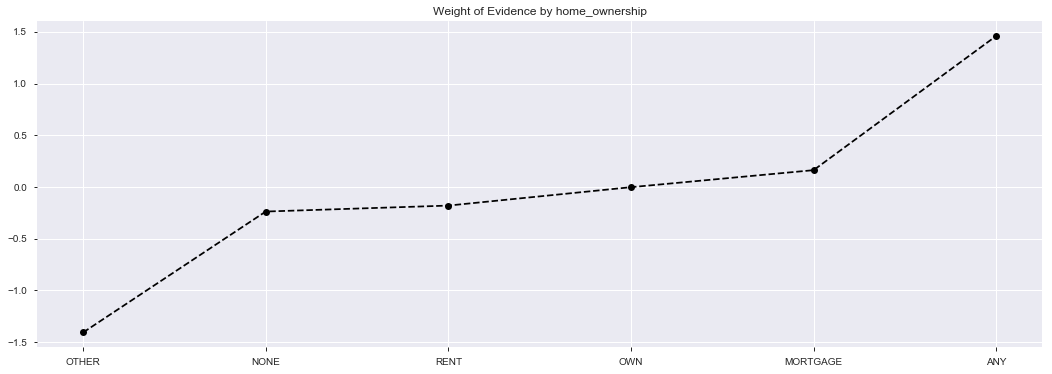

In [178]:
plot_by_woe(df_temp_2)

In [179]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

In [180]:
df_inputs_prepr['addr_state'].unique()

array(['NY', 'KY', 'CA', 'TX', 'AZ', 'FL', 'CO', 'IN', 'OH', 'LA', 'TN',
       'MA', 'MO', 'GA', 'WI', 'CT', 'AL', 'MI', 'IL', 'NJ', 'OK', 'NV',
       'KS', 'WA', 'OR', 'AK', 'VA', 'RI', 'MN', 'MD', 'NC', 'MS', 'PA',
       'UT', 'SC', 'MT', 'NH', 'NE', 'DE', 'NM', 'ME', 'HI', 'DC', 'ID',
       'AR', 'VT', 'WV', 'WY', 'ND', 'SD', 'IA'], dtype=object)

In [181]:
df_temp_3 = woe_discrete(df_inputs_prepr,'addr_state', df_targets_prepr)

In [182]:
df_temp_3

addr_state   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0          IA      10   0.300000    0.000006       3.0      7.0     0.000002   
1          AL   21439   0.840618    0.011987   18022.0   3417.0     0.011613   
2          OK   16274   0.844107    0.009099   13737.0   2537.0     0.008852   
3          AR   13561   0.844112    0.007582   11447.0   2114.0     0.007376   
4          LA   20325   0.846101    0.011364   17197.0   3128.0     0.011081   
5          MS   10105   0.846710    0.005650    8556.0   1549.0     0.005513   
6          NV   25957   0.852911    0.014513   22139.0   3818.0     0.014266   
7          NY  146121   0.853820    0.081697  124761.0  21360.0     0.080393   
8          HI    8406   0.856174    0.004700    7197.0   1209.0     0.004638   
9          FL  129096   0.858113    0.072179  110779.0  18317.0     0.071384   
10         NM    9486   0.858634    0.005304    8145.0   1341.0     0.005248   
11         MD   42368   0.861145    0.023688   36485.0   5883.0     0.023510   
12         MO   28453   0.861526    0.015908   24513.0   3940.0     0.015796   
13         AK    4241   0.861825    0.002371    3655.0    586.0     0.002355   
14         PA   60648   0.861974    0.033909   52277.0   8371.0     0.033686   
15         NC   49785   0.862911    0.027835   42960.0   6825.0     0.027683   
16         NJ   65461   0.862941    0.036600   56489.0   8972.0     0.036400   
17         IN   29707   0.863298    0.016609   25646.0   4061.0     0.016526   
18         KY   17300   0.864220    0.009673   14951.0   2349.0     0.009634   
19         CA  248214   0.864238    0.138778  214516.0  33698.0     0.138230   
20         SD    3631   0.865602    0.002030    3143.0    488.0     0.002025   
21         NE    6338   0.865731    0.003544    5487.0    851.0     0.003536   
22         TN   28429   0.865806    0.015895   24614.0   3815.0     0.015861   
23         MI   46190   0.865945    0.025825   39998.0   6192.0     0.025774   
24         DE    5128   0.866420    0.002867    4443.0    685.0     0.002863   
25         VA   49482   0.866517    0.027666   42877.0   6605.0     0.027629   
26         MN   31143   0.867868    0.017412   27028.0   4115.0     0.017416   
27         AZ   42587   0.868176    0.023811   36973.0   5614.0     0.023825   
28         TX  147497   0.868391    0.082467  128085.0  19412.0     0.082535   
29         OH   59487   0.868795    0.033260   51682.0   7805.0     0.033303   
30         MA   40961   0.872122    0.022902   35723.0   5238.0     0.023019   
31         UT   12096   0.875661    0.006763   10592.0   1504.0     0.006825   
32         GA   58820   0.875757    0.032887   51512.0   7308.0     0.033193   
33         WI   23640   0.877115    0.013217   20735.0   2905.0     0.013361   
34         IL   71626   0.884372    0.040047   63344.0   8282.0     0.040818   
35         CT   28405   0.885795    0.015881   25161.0   3244.0     0.016213   
36         RI    7882   0.885943    0.004407    6983.0    899.0     0.004500   
37         MT    5058   0.886319    0.002828    4483.0    575.0     0.002889   
38         WY    3765   0.889243    0.002105    3348.0    417.0     0.002157   
39         KS   15101   0.890669    0.008443   13450.0   1651.0     0.008667   
40         WA   37604   0.891581    0.021025   33527.0   4077.0     0.021604   
41         ND    2852   0.894460    0.001595    2551.0    301.0     0.001644   
42         CO   38120   0.894675    0.021313   34105.0   4015.0     0.021977   
43         SC   22245   0.898674    0.012437   19991.0   2254.0     0.012882   
44         OR   21478   0.900363    0.012009   19338.0   2140.0     0.012461   
45         DC    4167   0.903048    0.002330    3763.0    404.0     0.002425   
46         NH    8871   0.904295    0.004960    8022.0    849.0     0.005169   
47         WV    7384   0.910347    0.004128    6722.0    662.0     0.004332   
48         VT    3898   0.914315    0.002179    3564.0    334.0     0.002297   
49 

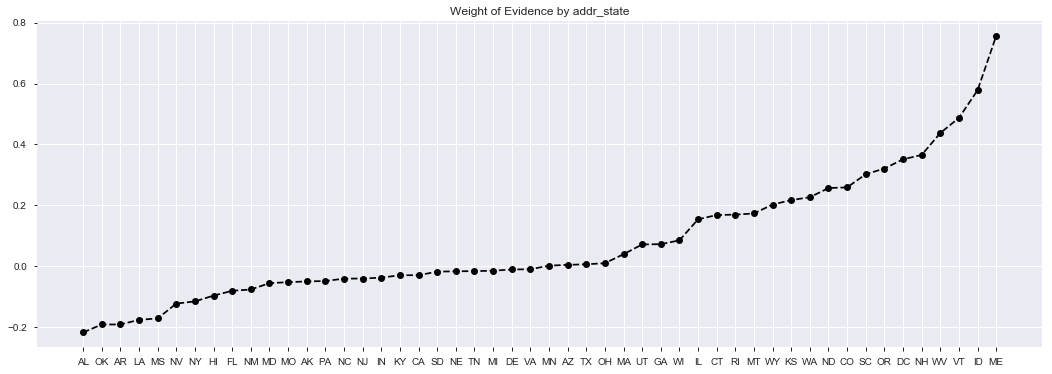

In [191]:
plot_by_woe(df_temp_3.iloc[1:,:])
# IA doesn't have enough to make the chart relavant

In [192]:
df_temp_4 = woe_discrete(df_inputs_prepr,'verification_status', df_targets_prepr)

In [195]:
df_temp_4

verification_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0            Verified  478537   0.823025    0.267554  393848.0  84689.0   
1     Source Verified  700718   0.862812    0.391777  604588.0  96130.0   
2        Not Verified  609309   0.908316    0.340669  553445.0  55864.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.253788    0.357816 -0.343522             NaN       NaN  0.086203  
1     0.389584    0.406155 -0.041656        0.039787  0.301866  0.086203  
2     0.356629    0.236029  0.412741        0.045504  0.454396  0.086203

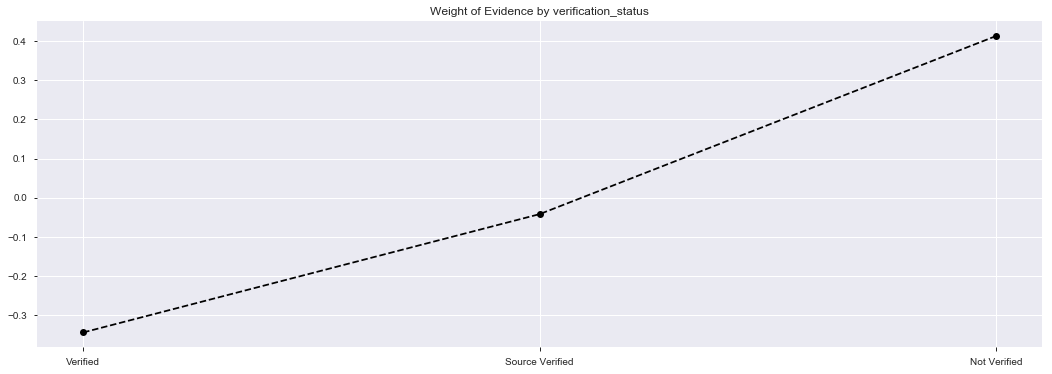

In [196]:
plot_by_woe(df_temp_4)

In [193]:
df_temp_5 = woe_discrete(df_inputs_prepr,'purpose', df_targets_prepr)

In [197]:
df_temp_5

purpose    n_obs  prop_good  prop_n_obs    n_good     n_bad  \
0          educational      324   0.641975    0.000181     208.0     116.0   
1       small_business    19150   0.790548    0.010707   15139.0    4011.0   
2               moving    11697   0.837394    0.006540    9795.0    1902.0   
3     renewable_energy     1129   0.838795    0.000631     947.0     182.0   
4              wedding     1767   0.853990    0.000988    1509.0     258.0   
5   debt_consolidation  1007789   0.857388    0.563463  864066.0  143723.0   
6              medical    21449   0.858781    0.011992   18420.0    3029.0   
7                other   108002   0.863493    0.060385   93259.0   14743.0   
8                house    11690   0.868263    0.006536   10150.0    1540.0   
9       major_purchase    38785   0.871342    0.021685   33795.0    4990.0   
10            vacation    12085   0.875465    0.006757   10580.0    1505.0   
11    home_improvement   117374   0.880885    0.065625  103393.0   13981.0   
12         credit_card   418891   0.893077    0.234205  374102.0   44789.0   
13                 car    18432   0.896159    0.010305   16518.0    1914.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.000134    0.000490 -1.296553             NaN       NaN  0.023637  
1      0.009755    0.016947 -0.552268        0.148573  0.744286  0.023637  
2      0.006312    0.008036 -0.241535        0.046846  0.310732  0.023637  
3      0.000610    0.000769 -0.231209        0.001401  0.010326  0.023637  
4      0.000972    0.001090 -0.114258        0.015194  0.116950  0.023637  
5      0.556786    0.607238 -0.086740        0.003398  0.027518  0.023637  
6      0.011869    0.012798 -0.075297        0.001393  0.011443  0.023637  
7      0.060094    0.062290 -0.035889        0.004712  0.039408  0.023637  
8      0.006540    0.006507  0.005190        0.004770  0.041079  0.023637  
9      0.021777    0.021083  0.032376        0.003079  0.027186  0.023637  
10     0.006818    0.006359  0.069671        0.004123  0.037296  0.023637  
11     0.066624    0.059071  0.120337        0.005420  0.050665  0.023637  
12     0.241064    0.189236  0.242065        0.012192  0.121728  0.023637  
13     0.010644    0.008087  0.274754        0.003082  0.032689  0.023637

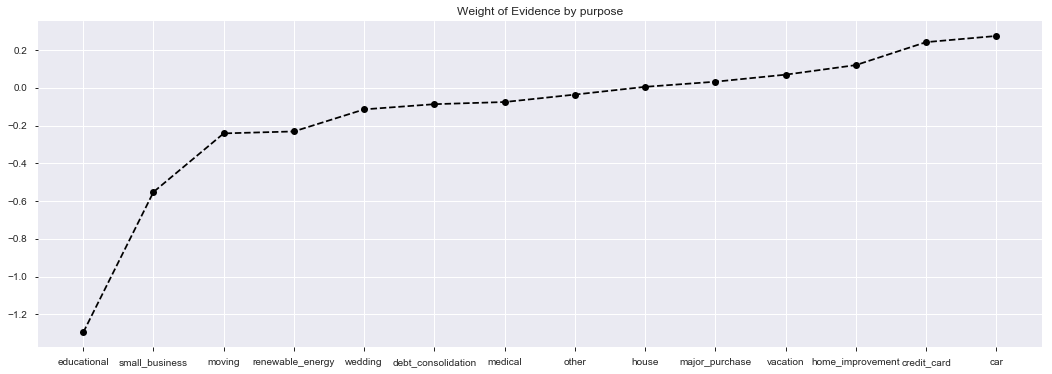

In [198]:
plot_by_woe(df_temp_5)

In [194]:
df_temp_6 = woe_discrete(df_inputs_prepr,'initial_list_status', df_targets_prepr)

In [199]:
df_temp_6

initial_list_status    n_obs  prop_good  prop_n_obs     n_good     n_bad  \
0                   f   546492   0.833557    0.305548   455532.0   90960.0   
1                   w  1242072   0.882677    0.694452  1096349.0  145723.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.293535    0.384312 -0.269455             NaN       NaN  0.036945  
1     0.706465    0.615688  0.137532        0.049121  0.406987  0.036945

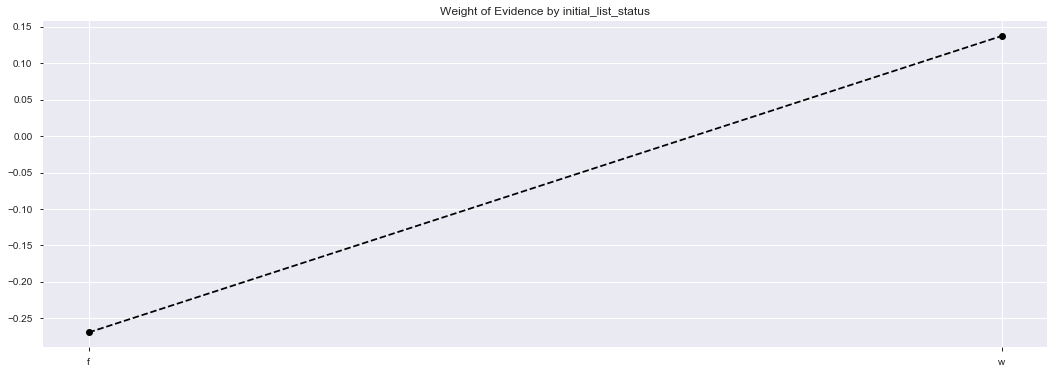

In [200]:
plot_by_woe(df_temp_6)

# Here is the Description of the info in the merged dataframe





t


In [17]:
info = pd.read_csv('LCDataDictionary.csv/browseNotes-Table 1.csv')

In [27]:
info = info.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4', 'Unnamed: 5'], axis=1)

In [44]:
pd.options.display.max_rows = None

In [60]:
pd.set_option('max_colwidth', 5000)

In [62]:
info.head(30)

BrowseNotesFile  \
0                      acceptD   
1                 accNowDelinq   
2            accOpenPast24Mths   
3                    addrState   
4                     all_util   
5             annual_inc_joint   
6                    annualInc   
7             application_type   
8                  avg_cur_bal   
9                  bcOpenToBuy   
10                      bcUtil   
11    chargeoff_within_12_mths   
12  collections_12_mths_ex_med   
13                 creditPullD   
14                  delinq2Yrs   
15                  delinqAmnt   
16                        desc   
17                         dti   
18                   dti_joint   
19              earliestCrLine   
20          effective_int_rate   
21                   emp_title   
22                   empLength   
23                        expD   
24              expDefaultRate   
25               ficoRangeHigh   
26                ficoRangeLow   
27                  fundedAmnt   
28                       grade   
29               homeOwnership   

                                                                                                                                                                                                           Description  
0                                                                                                                                                                      The date which the borrower accepted  the offer  
1                                                                                                                                                      The number of accounts on which the borrower is now delinquent.  
2                                                                                                                                                                           Number of trades opened in past 24 months.  
3                                                                                                                                                           The state provided by the borrower in the loan application  
4                                                                                                                                                                                Balance to credit limit on all trades  
5                                                                                                                            The combined self-reported annual income provided by the co-borrowers during registration  
6                                                                                                                                        The self-reported annual income provided by the borrower during registration.  
7                                                                                                                 Indicates whether the loan is an individual application or a joint application with two co-borrowers  
8                                                                                                                                                                              Average current balance of all accounts  
9                                                                                                                                                                            Total open to buy on revolving bankcards.  
10                                                                                                                               Ratio of total current balance to high credit/credit limit for all bankcard accounts.  
11                                                                                                                                                                              Number of charge-offs within 12 months  
12                                                                                                                                         

# Test Matrix to make sure I know how to do some preprocessing on a smaller file than the overall dataset

In [197]:
test_matrix = pd.DataFrame()

In [198]:
test_matrix = df[['loan_amnt','funded_amnt','int_rate','term','home_ownership']]
test_matrix = test_matrix.iloc[:1000,:]

In [199]:
explore_data(test_matrix)

The number of rows is 1,000 and the number of columns is 5


In [200]:
test_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
loan_amnt         1000 non-null object
funded_amnt       1000 non-null object
int_rate          1000 non-null object
term              1000 non-null object
home_ownership    1000 non-null object
dtypes: object(5)
memory usage: 39.1+ KB


In [191]:
ohe_enc = OneHotCategoricalEncoder(
    top_categories=None,
    variables=['home_ownership','int_rate'], # Can select which variables to encode
    drop_last=False)

In [192]:
tmp = ohe_enc.fit_transform(test_matrix)
# note that this is to replace doing a get_dummies and then concatenating onto parent dataframe
# should be a more robust pipeline creation methodology

In [193]:
tmp.head(1)

loan_amnt funded_amnt        term  home_ownership_RENT  home_ownership_OWN  \
0      5000        5000   36 months                    1                   0   

   home_ownership_MORTGAGE  int_rate_ 10.65%  int_rate_ 15.27%  \
0                        0                 1                 0   

   int_rate_ 15.96%  int_rate_ 13.49%  int_rate_ 12.69%  int_rate_  7.90%  \
0                 0                 0                 0                 0   

   int_rate_ 18.64%  int_rate_ 21.28%  int_rate_ 14.65%  int_rate_  9.91%  \
0                 0                 0                 0                 0   

   int_rate_ 16.29%  int_rate_  6.03%  int_rate_ 11.71%  int_rate_ 12.42%  \
0                 0                 0                 0                 0   

   int_rate_ 14.27%  int_rate_ 16.77%  int_rate_  7.51%  int_rate_  8.90%  \
0                 0                 0                 0                 0   

   int_rate_ 18.25%  int_rate_  6.62%  int_rate_ 19.91%  int_rate_ 17.27%  \
0                 0                 0                 0                 0   

   int_rate_ 17.58%  int_rate_ 21.67%  int_rate_ 19.42%  int_rate_ 22.06%  \
0                 0                 0                 0                 0   

   int_rate_ 20.89%  int_rate_ 20.30%  int_rate_ 23.91%  int_rate_ 19.03%  \
0                 0                 0                 0                 0   

   int_rate_ 23.52%  int_rate_ 23.13%  int_rate_ 22.74%  int_rate_ 22.35%  
0                 0                 0                 0                 0

In [12]:
test_matrix_dummies = pd.get_dummies(test_matrix['home_ownership'])

In [13]:
test_matrix_dummies.head(2)

MORTGAGE  OWN  RENT
0         0    0     1
1         0    0     1

In [14]:
test_matrix.shape

(1000, 5)

In [15]:
test_matrix_dummies.shape

(1000, 3)

In [16]:
test_matrix = pd.concat([test_matrix,test_matrix_dummies], axis=1)

In [17]:
test_matrix.head(2)

loan_amnt funded_amnt int_rate        term home_ownership  MORTGAGE  OWN  \
0      5000        5000   10.65%   36 months           RENT         0    0   
1      2500        2500   15.27%   60 months           RENT         0    0   

   RENT  
0     1  
1     1

In [18]:
test_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
loan_amnt         1000 non-null object
funded_amnt       1000 non-null object
int_rate          1000 non-null object
term              1000 non-null object
home_ownership    1000 non-null object
MORTGAGE          1000 non-null uint8
OWN               1000 non-null uint8
RENT              1000 non-null uint8
dtypes: object(5), uint8(3)
memory usage: 42.1+ KB


In [195]:
# test_matrix['int_rate'] = test_matrix['int_rate'].str.rstrip('%').astype(float) / 100.0
# df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float) / 100.0

In [196]:
test_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
loan_amnt         1000 non-null object
funded_amnt       1000 non-null object
int_rate          1000 non-null float64
term              1000 non-null object
home_ownership    1000 non-null object
dtypes: float64(1), object(4)
memory usage: 39.1+ KB


In [46]:
test_matrix.int_rate.head(3)

0    0.1065
1    0.1527
2    0.1596
Name: int_rate, dtype: float64

In [201]:
test_matrix['loan_amnt'] = pd.to_numeric(test_matrix['loan_amnt'])
test_matrix['funded_amnt'] = pd.to_numeric(test_matrix['funded_amnt'])
test_matrix['int_rate'] = test_matrix['int_rate'].str.rstrip('%').astype(float) / 100
test_matrix['term_int'] = test_matrix['term'].str.replace(' months','')
test_matrix['term_int'] = pd.to_numeric(test_matrix['term_int'])

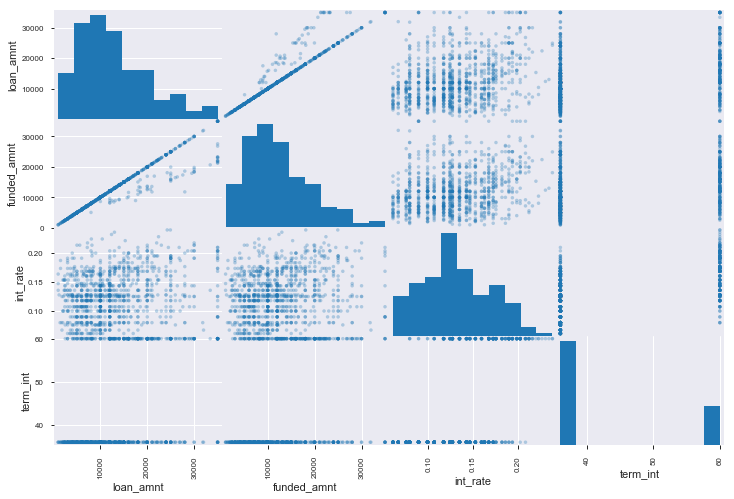

In [45]:
pd.plotting.scatter_matrix(test_matrix, figsize=(12,8), alpha=0.3);

In [22]:
df.columns[:10]
# what is difference bw funded_amnt and funded_amnt_inv? Looks like when did not get total funding
# grade vs sub_grade? much more detail in sub_grade - may not need grade

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade'],
      dtype='object')

In [23]:
df.columns[10:20]
# can prob drop emp_title; need to clean up emp_length
# one hot encode home_ownership
# what are unique verification_status
# one hot for loan_status
# how are pymnt_plan loans performing? could be interesting subsect
# is purpose relevant? keep for now but could drop - self reported data

Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'title'],
      dtype='object')

In [24]:
df.columns[20:30]
# dti is debt excl mortgage to self reported income
# delinq_2yrs is num of 30+ days past-due incidences of delinq in the borrower's credit file for the past 2 years

Index(['zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record'],
      dtype='object')

In [25]:
df.columns[30:40]
# open_acc is number of open credit lines
# pub_rec is num of neg public records
# ini_l_s is the initial listing status of the loan
# out_prncp is the outstanding principal for total amount funded

Index(['open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv'],
      dtype='object')

In [26]:
df.columns[40:50]
# last_pymnt_d is last month payment was received
# last_credit_pull_d is last month credit was pulled for this loan

Index(['total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high'],
      dtype='object')

In [27]:
df.columns[50:60]
# coll_ex_med could be interesting to compare to others - is it really relevant though?
# policy_code may not matter
# app_type is either indv or co-borrower
# 

Index(['last_fico_range_low', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt'],
      dtype='object')

In [28]:
df.columns[60:70]
# open_acc_6m is num of open trades in last 6 months
# open_il is number of installment accounts
# open_rv is number of revolving trades

Index(['tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m'],
      dtype='object')

In [29]:
df.columns[70:80]
# max_bal_bc is max current balance on all revolving accounts
# total_cu_tl is total number of finance trades
# bc_open_to_buy is total open to buy on revolving bankcards

Index(['max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl',
       'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy',
       'bc_util'],
      dtype='object')

In [30]:
df.columns[80:90]
# mo_sin_rcnt_rev_tl_op is months since oldest revolving account opened

Index(['chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq'],
      dtype='object')

In [31]:
df.columns[90:100]

Index(['mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0'],
      dtype='object')

In [32]:
df.columns[100:110]

Index(['num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim'],
      dtype='object')

In [33]:
df.columns[110:120]

Index(['total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc'],
      dtype='object')

In [34]:
df.columns[120:130]

Index(['sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_flag', 'hardship_type',
       'hardship_reason', 'hardship_status'],
      dtype='object')

In [35]:
df.columns[130:140]

Index(['deferral_term', 'hardship_amount', 'hardship_start_date',
       'hardship_end_date', 'payment_plan_start_date', 'hardship_length',
       'hardship_dpd', 'hardship_loan_status',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount'],
      dtype='object')

In [36]:
df.columns[140:]

Index(['hardship_last_payment_amount', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object')